# Spatial Analysis of Aquatic Predator-Prey Dynamics: Spiral Patterns

Author: Luke Vaughan

Course: MATH 645 Numerical Analysis II (College of Charleston, Fall 2021)

Instructor: Daniel Poll

$$\textbf{_____________________________________________________________________________________________________________________}$$    
    
$$$$
    
<div align="left"> 
    
$\underline{\text{Contents}}$

I. Introduction

II. Methods
    
        A. Nonlinear Reaction-Diffusion System
    
        B. Finite Differences
    
        C. Associated Linear System
    
        D. Code
        
            1. Parameters
        
            2. Sparse Matrix AMATs
        
                (i) Sparse Blocks Ss, Ts, Ws, Xs, Ys, and Zs
        
                (ii) Sparse Tridiagonal Block Matrix Ls
        
                (iii) Sparse Matrices B1s and B2s
        
            3. BVEC
        
                (i) Initial Conditions
        
                (ii) Initial Condition Plots
        
            4. Biconjugate Gradient Algorithm
        
            5. XSOLN
        
                (i) Time Loop

III. Results
    
        A. Pattern 1
    
        B. Pattern 2
    
        C. Pattern 3

IV. Conclusion

V. Appendix

VI. Sources

$$\textbf{_____________________________________________________________________________________________________________________}$$    

## I. Introduction

Spatial pattern formation is an intriguing topic in mathematical biology. Mathematical models, defined as systems of partial differential equations, yield rich predictions for several different types of populations. Here, the motivation is to study spatial pattern formation in an aquatic predator-prey model. The numerical techniques required for successful modeling are discussed in Methods. Six plots of spiral patterns are included in Results. A brief discussion on aquatic vs. terrestrial populations is included at the end. 

Predator-prey dynamics can be described mathematically by a system of coupled reaction-diffusion equations. Source [1] provides an example of a nonlinear reaction-diffusion system. Numerical simulations yield approximations for solutions on a two-dimensional domain. These simulations provide a "bird's-eye view" of the phenomena. Mathematicians frequently take this approach while studying applications in biology. In the source plots, we can see predictions for spatial patterns resembling spirals, labyrinths, and dartboards. The goal of this project is to reproduce the spiral patterns (source [1], p 944) and gain insights into predator-prey dynamics.

## II. Methods

## A. Nonlinear Reaction-Diffusion System

The dependent variables in the predator-prey model are $u(x,y,t)$ and $v(x,y,t)$, representing densities of the prey and predator, respectively. The two species interact in a square domain (500 $\times$ 500 m) with "zero-flux" boundary conditions (nothing enters or exits the domain). Assume that the units are in meters for the sake of visualization. Based on a Google Maps measurement [4], we can visualize a domain that is approximately the same size as Hampton Park in Charleston, SC. 

The authors of source [1] define the nonlinear reaction-diffusion system as

$$
\begin{cases} u_t = \delta_1 \nabla^2 u + ru\left(1 - u/w\right) - pvh(ku) \\ v_t = \delta_2 \nabla^2 v + qvh(ku) - sv\end{cases}
\tag{1}
$$

where $\nabla^2$ is the Laplacian operator and $\delta_1, \delta_2$ are the diffusion coefficients. The functional response $h(ku)$ represents the prey consumption rate per predator. The parameters are each given biological interpretations. For example, $p$ is the maximal consumption rate. "The constant $k$ determines how fast the consumption rate saturates as the prey density increases, $q$ and $r$ denote maximal per capita birth rates of predator and prey, respectively, $s$ is the per capita predator death rate, and $w$ is the prey-carrying capacity" [1].

After performing a transformation (see Appendix for details), we can obtain "dimensionless" forms of $u(x,y,t)$ and $v(x,y,t)$. The dimensionless forms (no units of measurement) are much easier to work with. We can also use the parameters in system (1) to define new parameters $a,b,c,$ and $\delta$. The dimensionless system is given as

$$
\begin{cases} u_t = \nabla^2 u + u(1 - u) - v h(au) \\ v_t = \delta \nabla^2 v + bv h(au) - cv \end{cases}
\tag{2}
$$

The authors of source [1] eventually replace the functional response $h$ in system (2) with

$$\hat{h}(\chi) = \frac{\chi}{1 + \big|\chi\big|} \tag{3}$$

<a id='cell3'></a>

## B. Finite Differences

Since system (2) is nonlinear and two-dimensional, we need sophisticated methods to solve it numerically. First, the authors of source [1] use finite differences to obtain the associated linear system (6). Then the result is written in block matrix notation (see "Scheme 2," p 939-940). Finally, the linear system is solved using GMRES. Here, the system is solved using the Biconjugate Gradient Algorithm instead. 

Some notation is given below.

$$\text{Square domain:} \; \Omega = [a,b] \times [a,b] \; \; \; \; \; (a = 0, b = 500)$$

$$\text{Grid points:} \; (x_i,y_j) = (ih + a, jh + a) \; \; \; \; \; i,j = 0,...,J$$

$$\text{Number of divisions of one axis:} \; J = \frac{b-a}{h} = 500$$

$$\text{Space stepsize:} \; h = \frac{b-a}{J} = 1$$

$$\text{Number of nodes on one axis:} \; \; \text{dim}J = J + 1 = 501$$

$$\text{Total number of nodes:} \; \; \text{ntotal} = \text{dim}J^2 = (J + 1)^2 = 251,001$$

$$\text{Time interval:} \; [0,T] \; \; \; \; \; (T = 150)$$

$$\text{Time stepsize:} \; \Delta t = \frac{T}{N} \; \; \; \; \; (\text{Pattern 1: 1/3, Pattern 2: 1/24, Pattern 3: 1/384})$$

$$\text{Number of time steps:} \; N = \frac{T}{\Delta t} \; \; \; \; \; \left(\text{Pattern 1: 450, Pattern 2: 3600, Pattern 3: 57600}\right)$$

$$\text{Approximation at point} \; (x_i,y_j,t_n): \; \vec{U}_{k}^n = \begin{bmatrix} U_{i,j}^n \\ V_{i,j}^n\end{bmatrix}$$

$$U_k^n = U_{i,j}^n \; \; \; \; \; \; \boldsymbol{k = i + j(J+1)} \; \; \; \; i,j = 0,...,J$$

$$V_k^n = V_{i,j}^n \; \; \; \; \; \; \boldsymbol{k = i + j(J+1)} \; \; \; \; i,j = 0,...,J$$

The finite difference scheme, "Scheme 2" in source [1], is given as 

$$f\left(\vec{U}_{k}^{n-1}\right) = U_{i,j}^{n-1} - U_{i,j}^{n-1}\big|U_{i,j}^{n-1}\big| - V_{i,j}^{n-1} \hat{h}\left(a U_{i,j}^{n-1}\right) \tag{4}$$

$$g\left(\vec{U}_{k}^{n-1}\right) = bV_{i,j}^{n-1}\hat{h}\left(aU_{i,j}^{n-1}\right) - cV_{i,j}^{n-1} \tag{5}$$

$$n = 1,...,N$$

## C. Associated Linear System

Using the finite difference scheme above, the associated linear system can be expressed in block matrix notation:

$$
\left[\begin{array}{c|c} B_1 & 0  \\ \hline 0 & B_2 \end{array}\right] \begin{bmatrix} U_k^n \\ V_k^n \end{bmatrix} = \begin{bmatrix} U_k^{n-1} + \Delta t F \\ V_k^{n-1} + \Delta t G\end{bmatrix} \; \; \; \; \; 1 \leq n \leq N
\tag{6}
$$

$$\{F\}_k = f\left(\vec{U}_{k}^{n-1}\right) \; \; \; \; \; \{G\}_k = g\left(\vec{U}_{k}^{n-1}\right)$$

System (6) appears in the code as ``AMATs XSOLN = BVEC``. This system is solved $N$ times via the Biconjugate Gradient Algorithm in the time loop. The matrices $B_1$ and $B_2$ are defined on p 953-954 in source [1] as

$$B_1 = I + \Delta t L \; \; \; \; \; \; \; \; \; \; B_2 = I + \delta \Delta t L$$

where $I$ is the identity matrix. $L$ is a $(J+1)^2 \times (J+1)^2$ block tridiagonal matrix consisting of $(J+1) \times (J+1)$ blocks. The matrix and vectors in system (6) are large: ``AMATs`` is $2(J+1)^2 \times 2(J+1)^2,$ ``XSOLN`` is $2(J+1)^2 \times 1$, and ``BVEC`` is $2(J+1)^2 \times 1$. However, we can save storage by defining the blocks in ``AMATs`` as sparse matrices.

The block tridiagonal matrix $L$ is given as

$$L = \frac{1}{h^2}\begin{bmatrix} S & T & \hfill \\ W & X & W & \hfill \\ \hfill & W & X & W & \hfill \\ \hfill & \hfill & \ddots & \ddots & \ddots & \hfill \\ \hfill & \hfill & \hfill & W & X & W & \hfill \\ \hfill & \hfill & \hfill & \hfill & W & X & W \\ \hfill & \hfill & \hfill & \hfill & \hfill & Y & Z\end{bmatrix} \tag{7}$$

where the blocks $S,T,W,X,Y,Z$ are defined below. $L$ is built slowly and carefully in the code (one block at a time in the order shown). The blocks are given as

$$S = \begin{bmatrix} 3 & -3/2 & \hfill \\ -1 & 4 & -1 & \hfill \\ \hfill & -1 & 4 & -1 & \hfill \\ \hfill & \hfill & \ddots & \ddots & \ddots & \hfill \\ \hfill & \hfill & \hfill & -1 & 4 & -1 & \hfill \\ \hfill & \hfill & \hfill & \hfill & -1 & 4 & -1 \\ \hfill & \hfill & \hfill & \hfill & \hfill & -3 & 6\end{bmatrix} \; \; \; \; \; \; \; \; \; \; T = \text{diag}\big\{-3/2,-2,-2,...,-2,-2,-3\big\}$$

$$W = -I \; \; \; \; \; \; \; \; \; \; X = \begin{bmatrix} 4 & -2 & \hfill \\ -1 & 4 & -1 & \hfill \\ \hfill & -1 & 4 & -1 & \hfill \\ \hfill & \hfill & \ddots & \ddots & \ddots & \hfill \\ \hfill & \hfill & \hfill & -1 & 4 & -1 & \hfill \\ \hfill & \hfill & \hfill & \hfill & -1 & 4 & -1 \\ \hfill & \hfill & \hfill & \hfill & \hfill & -2 & 4\end{bmatrix} $$

$$Y = \text{diag}\big\{-3,-2,-2,...,-2,-2,-3/2 \big\} \; \; \; \; \; \; \; \; \; \; Z = \begin{bmatrix} 6 & -3 & \hfill \\ -1 & 4 & -1 & \hfill \\ \hfill & -1 & 4 & -1 & \hfill \\ \hfill & \hfill & \ddots & \ddots & \ddots & \hfill \\ \hfill & \hfill & \hfill & -1 & 4 & -1 & \hfill \\ \hfill & \hfill & \hfill & \hfill & -1 & 4 & -1 \\ \hfill & \hfill & \hfill & \hfill & \hfill & -3/2 & 3\end{bmatrix}$$

where $\text{diag}$ denotes a diagonal matrix. These matrices are defined in source [1] with the zero-flux boundary conditions in mind. The discussion on boundary conditions (p 952-953) is omitted here for the sake of brevity.

## D. Code 

The following code is written for the purpose of solving ``AMATs XSOLN = BVEC`` at each time step. 

## 1. Parameters

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
#Set values for parameters corresponding to Fig. 4 in [1]

alpha = 0.4
beta = 2.0
gamma = 0.6
delta = 1.0

#Domain

a = 0.0
b = 500.0

#Space step

h = 1.0                              

#Time step
#Figure 4 (b)

deltat_pattern1 = 1.0/3.0

#Max time

T = 150.0

In [3]:
#Constants: line 16 in fd2d.m in [3]

J = (b-a)/h                #number of divisions of x-axis
dimJ = J+1                 #number of nodes on x-axis
ntotal = dimJ**2           #total number of nodes for U and V each 
N = T/deltat_pattern1      #number of time steps 

In [4]:
#Convert to integers to be used in loops

ntotalint = int(ntotal)     
dimJint = int(dimJ)         
Nint = int(N)

In [5]:
#Mesh: line 26 in fd2d.m in [3]

coords = np.zeros(dimJint)
for i in range(dimJint):
    coords[i] = i
     
X, Y = np.meshgrid(coords,coords)    #line 29 in fd2d.m in [3]: rename "x" as "coords"

## 2. Sparse Matrix AMATs

## (i) Sparse Blocks Ss, Ts, Ws, Xs, Ys, and Zs

In [6]:
#Each block in L is dimJ x dimJ where dimJ = J + 1
#L is dimJ^2 x dimJ^2

#Make each block in L one at a time with tridiags function
#The "n" in the tridiags function is dimJ here

n = 501                      

from scipy import sparse as sp

def tridiags(lower,main,upper,n):
    return sp.diags(lower*np.ones(n-1), -1) + sp.diags(main*np.ones(n), 0) +sp.diags(upper*np.ones(n-1), 1)

In [7]:
#Sparse S

Ss = tridiags(-1,4,-1,n)
Ss[0,0] = 3
Ss[0,1] = -1.5
Ss[n-1,n-2] = -3
Ss[n-1,n-1] = 6

#Sparse T

Ts = tridiags(0,-2,0,n)   
Ts[0,0] = -1.5
Ts[n-1,n-1] = -3

#Sparse W

Ws = tridiags(0,-1,0,n)  

#Sparse X

Xs = tridiags(-1,4,-1,n)  
Xs[0,1] = -2
Xs[n-1,n-2] = -2

#Sparse Y

Ys = tridiags(0,-2,0,n)    
Ys[0,0] = -3
Ys[n-1,n-1] = -1.5

#Sparse Z

Zs = tridiags(-1,4,-1,n)  
Zs[0,0] = 6
Zs[0,1] = -3
Zs[n-1,n-2] = -1.5
Zs[n-1,n-1] = 3

## (ii) Sparse Tridiagonal Block Matrix Ls

We can construct the sparse matrix ``Ls`` (7) using the blocks defined above.

In [8]:
#Construct Ls in 3 steps

inds = np.arange(n**2,dtype=int)
indsrowsl = inds[n-1::n]           #row indeces where -2 occurs in X (lower diagonal)
indscolsl = inds[n-2::n]           #column indeces where -2 occurs in X (lower diagonal)
indsrowsu = inds[0::n]             #row indeces where -2 occurs in X (upper diagonal)
indscolsu = inds[1::n]             #column indeces where -2 occurs in X (upper diagonal)

In [9]:
#Step 1: symmetric tridiagonal block matrix (X on main diagonal, W on upper and lower diagonals)

def makepreLs(n):
    
    result1 = sp.diags(4.0*np.ones(n*n),0) + sp.diags(-1.0*np.ones(n*n-1),-1) + sp.diags(-1.0*np.ones(n*n-1),1)
    result1[n::n,n-1::n] = 0                         
    result1[n-1::n,n::n] = 0 
    
    for i in range(n):
        if indsrowsl[i] - indscolsl[i] == 1:         
            result1[indsrowsl,indscolsl] = -2       
    for i in range(n):
        if indscolsu[i] - indsrowsu[i] == 1:         
            result1[indsrowsu,indscolsu] = -2
            
    result2 = sp.diags(-1.0*np.ones(n*(n-1)),-n)      
    result3 = sp.diags(-1.0*np.ones(n*(n-1)),n)      
    
    result = result1 + result2 + result3
    return result

#Step 2: Replace blocks on top and bottom rows 
#The result is L before being multiplied by 1/(h^2)
    
preLs = makepreLs(n)

preLs[0:n, 0:n] = Ss
preLs[0:n, n:2*n] = Ts
preLs[n**2-n:n**2, n**2-2*n:n**2-n] = Ys
preLs[n**2-n:n**2, n**2-n:ntotalint] = Zs

#Step 3: multiply L by 1/(h^2)

Ls = (1/(h**2))*preLs

C:\Users\lukev\Anaconda3\lib\site-packages\scipy\sparse\_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


## (iii) Sparse Matrices B1s and B2s

``B1s`` and ``B2s`` are used to define ``AMATs`` below.

In [10]:
#Sparse B1 and B2

from scipy.sparse import identity

Is = identity(n**2)
B1s = Is + deltat_pattern1*Ls
B2s = Is + delta*deltat_pattern1*Ls

In [11]:
#AMATs is a sparse block matrix with B1 and B2 on diagonal
#Use block_diag to make AMATs

#Import block_diag dense version, use to demonstrate what block_diag sparse version does

from scipy.linalg import block_diag as bd_la

#Simple example to demonstrate what block_diag does

test1 = np.array([[1.,2.],[3.,4.]])
test2 = np.array([[5.,6.],[7.,8.]])
test = bd_la(test1,test2)

print('Simple example')
print('************************************************************')
print('What block_diag does: take')
print(test1)
print('and')
print(test2)
print('then make')
print(test)
print('************************************************************')
print('')

#Import block_diag sparse version

from scipy.sparse import block_diag as bd_sp

#Make AMATs

AMATs = bd_sp((B1s,B2s))
print('Sparse version of block_diag used to make AMATs')
print('AMATs is a ',np.shape(AMATs),' matrix')

Simple example
************************************************************
What block_diag does: take
[[1. 2.]
 [3. 4.]]
and
[[5. 6.]
 [7. 8.]]
then make
[[1. 2. 0. 0.]
 [3. 4. 0. 0.]
 [0. 0. 5. 6.]
 [0. 0. 7. 8.]]
************************************************************

Sparse version of block_diag used to make AMATs
AMATs is a  (502002, 502002)  matrix


## 3. BVEC

``BVEC`` is on the right-hand side of system (6). Define the two sums in ``BVEC`` as

$$
\begin{align*}
y1 & = U_k^{n-1} + \Delta t F \\
y2 & =  V_k^{n-1} + \Delta t G
\end{align*}
$$

Since we have $n = 1,...,N,$ we need to set up ``BVEC`` with the initial condition provided in "fd2d.inp" [3].

## (i) Initial Conditions

In [12]:
#Fill BVEC at time t = 0: start with U0 and V0

def U0(X,Y):
    return (6.0/35.0) - (2e-7)*((X - 0.1*Y - 225.0)*(X - 0.1*Y - 675.0))
def V0(X,Y):
    return (116.0/245.0) - (3e-5)*(X-450.0) - (1.2e-4)*(Y-150.0)

## (ii) Initial Condition Plots

Initial condition plots are not provided in source [1]. However, for the sake of our curiosity, we can utilize color plots to see where the two species are at time $t = 0$. Both plots reveal striped patterns. The prey is concentrated in the east and the predator is concentrated in the south.

<ipython-input-13-2177915f77f2>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imUinit = plt.pcolor(X,Y,Uinit,cmap=cmap)


(0.0, 400.0)

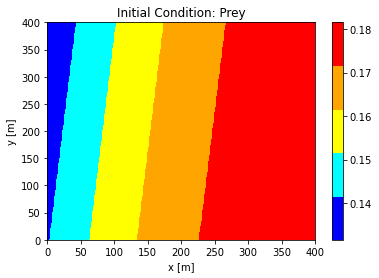

In [13]:
#Initial condition: prey

Uinit = U0(X,Y)*(np.ones((dimJint,dimJint)))

#Plot

import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['blue','cyan','yellow','orange','red'])

imUinit = plt.pcolor(X,Y,Uinit,cmap=cmap)
plt.colorbar(imUinit)
plt.title("Initial Condition: Prey")
plt.xlabel("x [m]")
plt.ylabel("y [m]")

#In [1], plots go up to x = y = 400
#In whole grid, x and y go up to 500

plt.xlim(0,400)
plt.ylim(0,400)

<ipython-input-14-b32769421f8c>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imVinit = plt.pcolor(X,Y,Vinit,cmap=cmap)


(0.0, 400.0)

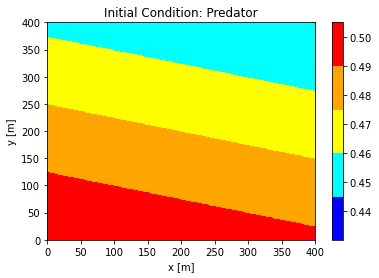

In [14]:
#Initial condition: predator

Vinit = V0(X,Y)*(np.ones((dimJint,dimJint)))

#Plot

imVinit = plt.pcolor(X,Y,Vinit,cmap=cmap)
plt.colorbar(imVinit)
plt.title("Initial Condition: Predator")
plt.xlabel("x [m]")
plt.ylabel("y [m]")

#Match x and y axis to prey plot

plt.xlim(0,400)              
plt.ylim(0,400)    

In [15]:
#Convert initial condition matrices to vectors

#Source: https://numpy.org/devdocs/user/numpy-for-matlab-users.html
#MATLAB command a'...
#has the equivalent command a.conj().T in NumPy

Uinit = Uinit.conj().T            
Vinit = Vinit.conj().T            

#Source: https://numpy.org/devdocs/user/numpy-for-matlab-users.html
#MATLAB command y = x(:)...
#has the equivalent command y = x.flatten() in NumPy

Uvec = Uinit.flatten('F')         
Vvec = Vinit.flatten('F')         

The remaining steps needed to construct ``BVEC`` are shown in the time loop.

## 4. Biconjugate Gradient Algorithm

Since ``AMATs`` is so large, we need an iterative scheme. The Biconjugate Gradient Algorithm is an iterative scheme that converges quickly to the solution. So this algorithm is a suitable candidate to solve ``AMATs BVEC = XSOLN`` at each time step. 

In [16]:
#Biconjugate Gradient Algorithm

def bcg(A,b,x0,r0star,tol):  
    
    r0 = b - A@x0
    
    if np.dot(r0,r0star) != 0:
        p0 = r0
        p0star = r0star
        
        rprev = r0
        pprev = p0
        xprev = x0
        pstarprev = p0star
        rstarprev = r0star
        rprevnorm = la.norm(rprev,2)    
        
        itcount = 0
        
        for i in range(50):                   
        
            alpha = np.dot(rprev,rstarprev)/np.dot(A@pprev,pstarprev)
            xnext = xprev + alpha*pprev
            rnext = rprev - alpha*(A@pprev)
            rstarnext = rstarprev - alpha*((np.transpose(A))@pstarprev)
            beta = np.dot(rnext,rstarnext)/np.dot(rprev,rstarprev)
            pnext = rnext + beta*pprev
            pstarnext = rstarnext + beta*pstarprev
        
            rprev = rnext
            xprev = xnext
            pprev = pnext
            pstarprev = pstarnext
            rstarprev = rstarnext
        
            itcount = itcount + 1
            rnextnorm = la.norm(rnext,2)
        
            if rnextnorm < tol:
                return xnext
    
    else:
        print('Choose different r0*')

## 5. XSOLN

Use the ``bcg`` function to solve system (6) repeatedly in the time loop below.

## (i) Time Loop

The runtimes for each time loop are given below.

$$\text{Pattern 1: ~10 min}$$

$$\text{Pattern 2: ~15 min}$$

$$\text{Pattern 3: ~2 hr 15 min}$$

In [17]:
#Functional response

def hhatfunc(par, vec):
    return vec/(par + np.absolute(vec))

#Function bcg needs r0star, x0, and tol inputs

dimxsoln = 2*(dimJ**2)
dimxsolnint = int(dimxsoln)
r0star = 0.5*np.ones(dimxsolnint)
x0 = 0.5*np.ones(dimxsolnint)
tol = 1e-6

In [18]:
#Time loop
#N = 150/(1/3) = 450 time steps
#Runtime ~10 min

for i in range(1,Nint+1): 
    hhat = hhatfunc(alpha, Uvec)
    F = Uvec - (Uvec*np.absolute(Uvec)) - (Vvec*hhat)
    G = beta*(Vvec*hhat) - (gamma*Vvec)
    y1 = Uvec + deltat_pattern1*F
    y2 = Vvec + deltat_pattern1*G
    BVEC = np.concatenate((y1,y2))
    XSOLN = bcg(AMATs,BVEC,x0,r0star,tol)
    UvecandVvec = np.split(XSOLN,2)
    Uvec = UvecandVvec[0]
    Vvec = UvecandVvec[1]

In [19]:
#Convert Uvec and Vvec to matrices

#Source: https://numpy.org/devdocs/user/numpy-for-matlab-users.html
#MATLAB command z = reshape(x,3,4)...
#has the equivalent command z = x.reshape(3,4,order='F').copy() in NumPy   

Ugrid = Uvec.reshape(dimJint,dimJint,order='F').copy()         
Vgrid = Vvec.reshape(dimJint,dimJint,order='F').copy()         

#Source: https://numpy.org/devdocs/user/numpy-for-matlab-users.html
#MATLAB command a'...
#has the equivalent command a.conj().T in NumPy

Ugrid = Ugrid.conj().T                                         
Vgrid = Vgrid.conj().T                                         

## III. Results

Compare the following results to the spiral patterns in Figure 4 (b), (d), (f) in source [1]. Note: the authors do not provide predator plots. However, for the sake of our curiosity, predator plots are provided here. Pattern 1 corresponds to (b), Pattern 2 corresponds to (d), and Pattern 3 corresponds to (f). 

## A. Pattern 1

Compare to Figure 4 (b) in source [1].

<ipython-input-20-1f2386fc805a>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imU = plt.pcolor(X,Y,Ugrid,cmap=cmap)


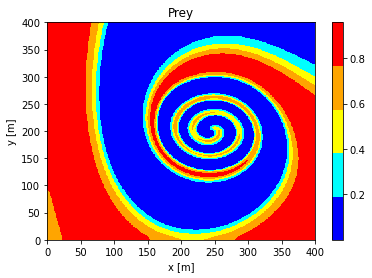

<Figure size 432x288 with 0 Axes>

In [20]:
#Prey plot

preyplot1 = plt.figure()                            

imU = plt.pcolor(X,Y,Ugrid,cmap=cmap)
plt.colorbar(imU)
plt.title("Prey")
plt.xlabel("x [m]")
plt.ylabel("y [m]")

plt.xlim(0,400)
plt.ylim(0,400)

preyplot1 = plt.gcf()                              
plt.show()                                         
plt.draw()                                         
preyplot1.savefig("preyplot1.png",dpi=100)         

<ipython-input-21-9a3cdb2fddd8>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imV = plt.pcolor(X,Y,Vgrid,cmap=cmap)


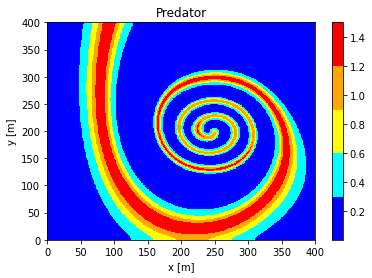

<Figure size 432x288 with 0 Axes>

In [21]:
#Predator plot

predatorplot1 = plt.figure()         

imV = plt.pcolor(X,Y,Vgrid,cmap=cmap)
plt.colorbar(imV)
plt.title("Predator")
plt.xlabel("x [m]")
plt.ylabel("y [m]") 

plt.xlim(0,400)              
plt.ylim(0,400)  

predatorplot1 = plt.gcf()                                
plt.show()                                               
plt.draw()                                               
predatorplot1.savefig("predatorplot1.png",dpi=100)       

## B. Pattern 2

Compare to Figure 4 (d) in source [1].

In [23]:
#Time step
#Figure 4 (d)

deltat_pattern2 = 1.0/24.0

#Number of time steps

N = T/deltat_pattern2       

#Convert to integer to be used in loops

Nint = int(N)

In [24]:
#Sparse B1 and B2

B1s = Is + deltat_pattern2*Ls
B2s = Is + delta*deltat_pattern2*Ls

In [25]:
#Make AMATs

AMATs = bd_sp((B1s,B2s))

In [26]:
#Convert initial condition matrices to vectors

Uvec = Uinit.flatten('F')         
Vvec = Vinit.flatten('F')         

In [27]:
#Time loop
#N = 150/(1/24) = 3,600 time steps
#Runtime ~15 min

for i in range(1,Nint+1): 
    #print('TIME STEP ', i)                                                            #TOGGLE COMMENT
    hhat = hhatfunc(alpha, Uvec)
    F = Uvec - (Uvec*np.absolute(Uvec)) - (Vvec*hhat)
    G = beta*(Vvec*hhat) - (gamma*Vvec)
    y1 = Uvec + deltat_pattern2*F
    y2 = Vvec + deltat_pattern2*G
    BVEC = np.concatenate((y1,y2))
    XSOLN = bcg(AMATs,BVEC,x0,r0star,tol)
    UvecandVvec = np.split(XSOLN,2)
    Uvec = UvecandVvec[0]
    Vvec = UvecandVvec[1]

In [28]:
#Convert Uvec and Vvec to matrices  

Ugrid = Uvec.reshape(dimJint,dimJint,order='F').copy()         
Vgrid = Vvec.reshape(dimJint,dimJint,order='F').copy()         

Ugrid = Ugrid.conj().T                                         
Vgrid = Vgrid.conj().T  

<ipython-input-29-02248971b3a4>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imU = plt.pcolor(X,Y,Ugrid,cmap=cmap)


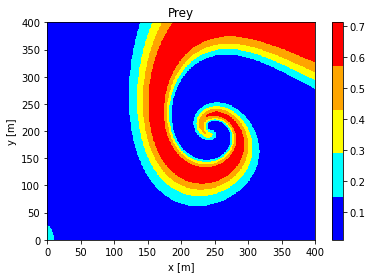

<Figure size 432x288 with 0 Axes>

In [29]:
#Prey plot

preyplot2 = plt.figure()                            

imU = plt.pcolor(X,Y,Ugrid,cmap=cmap)
plt.colorbar(imU)
plt.title("Prey")
plt.xlabel("x [m]")
plt.ylabel("y [m]")

plt.xlim(0,400)
plt.ylim(0,400)

preyplot2 = plt.gcf()                              
plt.show()                                         
plt.draw()
preyplot2.savefig("preyplot2.png",dpi=100)         

<ipython-input-30-c0985acad1b1>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imV = plt.pcolor(X,Y,Vgrid,cmap=cmap)


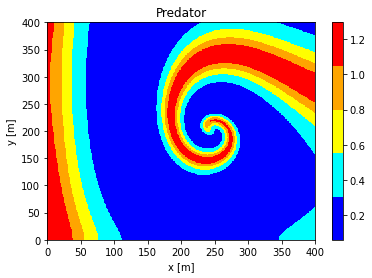

<Figure size 432x288 with 0 Axes>

In [30]:
#Predator plot

predatorplot2 = plt.figure()                              

imV = plt.pcolor(X,Y,Vgrid,cmap=cmap)
plt.colorbar(imV)
plt.title("Predator")
plt.xlabel("x [m]")
plt.ylabel("y [m]") 

plt.xlim(0,400)              
plt.ylim(0,400)  

predatorplot2 = plt.gcf()                                
plt.show()                                               
plt.draw()                                               
predatorplot2.savefig("predatorplot2.png",dpi=100)       

## C. Pattern 3

Compare to Figure 4 (f) in source [1].

In [31]:
#Time step
#Figure 4 (f)

deltat_pattern3 = 1.0/384.0

#Number of time steps

N = T/deltat_pattern3               
Nint = int(N)

In [32]:
#Make AMATs

B1s = Is + deltat_pattern3*Ls
B2s = Is + delta*deltat_pattern3*Ls
AMATs = bd_sp((B1s,B2s))

In [33]:
#Convert Uinit and Vinit matrices to vectors

Uvec = Uinit.flatten('F')        
Vvec = Vinit.flatten('F')         

In [34]:
#Time loop
#N = 150/(1/384) = 57,600 time steps
#Runtime ~2 hr 15 min

for i in range(1,Nint+1): 
    hhat = hhatfunc(alpha, Uvec)
    F = Uvec - (Uvec*np.absolute(Uvec)) - (Vvec*hhat)
    G = beta*(Vvec*hhat) - (gamma*Vvec)
    y1 = Uvec + deltat_pattern3*F
    y2 = Vvec + deltat_pattern3*G
    BVEC = np.concatenate((y1,y2))
    XSOLN = bcg(AMATs,BVEC,x0,r0star,tol)
    UvecandVvec = np.split(XSOLN,2)
    Uvec = UvecandVvec[0]
    Vvec = UvecandVvec[1]

In [35]:
#Convert Uvec and Vvec to matrices  

Ugrid = Uvec.reshape(dimJint,dimJint,order='F').copy()         
Vgrid = Vvec.reshape(dimJint,dimJint,order='F').copy()         

Ugrid = Ugrid.conj().T                                         
Vgrid = Vgrid.conj().T        

<ipython-input-36-03c04eab5242>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imU = plt.pcolor(X,Y,Ugrid,cmap=cmap)


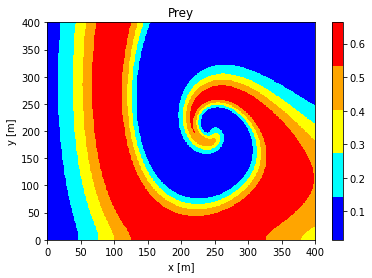

<Figure size 432x288 with 0 Axes>

In [36]:
#Prey plot

preyplot3 = plt.figure()                            

imU = plt.pcolor(X,Y,Ugrid,cmap=cmap)
plt.colorbar(imU)
plt.title("Prey")
plt.xlabel("x [m]")
plt.ylabel("y [m]")

plt.xlim(0,400)
plt.ylim(0,400)

preyplot3 = plt.gcf()                              
plt.show()                                         
plt.draw()                                         
preyplot3.savefig("preyplot3.png",dpi=100)         

<ipython-input-37-07a0cdff2e64>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imV = plt.pcolor(X,Y,Vgrid,cmap=cmap)


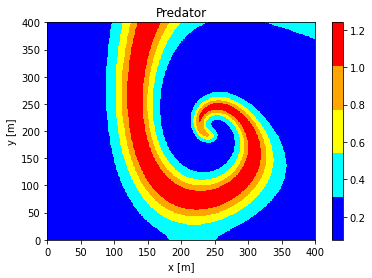

<Figure size 432x288 with 0 Axes>

In [37]:
#Predator plot 

predatorplot3 = plt.figure()                              

imV = plt.pcolor(X,Y,Vgrid,cmap=cmap)
plt.colorbar(imV)
plt.title("Predator")
plt.xlabel("x [m]")
plt.ylabel("y [m]") 

plt.xlim(0,400)              
plt.ylim(0,400)  

predatorplot3 = plt.gcf()                                
plt.show()                                               
plt.draw()                                               
predatorplot3.savefig("predatorplot3.png",dpi=100)       

## IV. Conclusion

We can discuss three noteworthy aspects of the spiral patterns. First, the patterns are not stationary. Second, the patterns are linked to the behavior of aquatic populations. Third, the populations are staggered throughout the domain, providing insights into predator-prey dynamics.

The authors of source [1] briefly discuss why the patterns are not stationary on p 935. Stationary spatial patterns rely on significant differences between predator and prey diffusion coefficients. "In some situations, one can assume that the diffusion coefficients of predators and prey are equal, excluding the possibility of 'Turing patterns.' For example, this assumption is valid for plankton communities, where turbulent diffusivity is usually much greater than the diffusivity of the plankton species, but less valid for terrestrial communities, where the predator population is typically more motile than the prey population" [1]. 

The diffusion coefficients for both species are set equal to 1 in the source code [2]. Therefore, the populations modeled here can be characterized as aquatic. For future projects, we could choose to model terrestrial populations instead. Then we could study different types of patterns.

The spiral patterns reveal that the prey actively avoids the predator. In Pattern 1 and Pattern 3, the predator is chasing the prey to the outskirts of the domain. In Pattern 2, the predator is closing in on the prey in the interior. In each case, the two species are staggered. The word "staggered" is often fitting when describing numerical simulations of predator-prey dynamics. Generally, wherever the density is high for one species, the density is low for the other (and vice versa). These results are what we should expect to see.

## V. Appendix

The change of variables in system (1) and newly defined parameters are given below. Drop the tildes to obtain the dimensionless system (2).

$$\tilde{u} = \frac{u}{w} \; \; \; \; \; \; \; \; \; \; \tilde{v} = v\left(\frac{p}{rw}\right) \; \; \; \; \; \; \; \; \; \; \tilde{t} = rt \; \; \; \; \; \; \; \; \; \; \tilde{x_i} = x_i\left(\frac{r}{\delta_1}\right)^{1/2}$$

$$a = kw \; \; \; \; \; \; \; \; \; \; b = \frac{q}{r} \; \; \; \; \; \; \; \; \; \; c = \frac{s}{r} \; \; \; \; \; \; \; \; \; \; \delta = \frac{\delta_2}{\delta_1}$$

## VI. Sources

$\color{blue}{[1]}$ Garvie, Marcus R. “Finite-Difference Schemes for Reaction–Diffusion Equations Modeling Predator–Prey Interactions in MATLAB.” Bulletin of Mathematical Biology, Springer-Verlag, 1 Feb. 2007, https://link.springer.com/article/10.1007/s11538-006-9062-3. 

$\color{blue}{[2]}$ Source code: https://github.com/mgarvie/PRED_PREY_SIM_FD2D/blob/master/fd2d.m

$\color{blue}{[3]}$ Additional files: 
https://github.com/mgarvie/PRED_PREY_SIM_FD2D

$\color{blue}{[4]}$ Visualization of domain size: https://drive.google.com/file/d/14Hoq4J0xHebDvFw05Ch_d-fggKgOCqXI/view

https://drive.google.com/file/d/1x35gobKiMUvsf74Vp4kq4wG4nItcmxTw/view?usp=sharing